# ELASTICA PROBLEM OF A CANTILEVER WITH A TRNSVERSE POINT LOAD AT THE END

The notation of some of the terms are as follows:
\begin{gather}
    \begin{aligned}
        s &- Arc\:length\:parameter(Deformed\:configuration)\\
        \theta &- Slope(Angle)\:of\:tangent\:with\:X-axis\:at\:particular\:s\\
        \frac{{\rm d} \theta}{{\rm d} s} &- Curvature\:at\:particular\:s\\
         F(p,\phi) &- \int_0^{\phi} \frac{{\rm d} \phi}{\sqrt{1-p^2 \sin^2 \phi}} = Incomplete\;Elliptic\; Integral\; of\; 1st\; Kind\\
        K(p) &- \int_0^{\frac{\pi}{2}} \frac{{\rm d} \phi}{\sqrt{1-p^2 \sin^2 \phi}} = Complete\;Elliptic\; Integral\; of\; 1st\; Kind\\
        E(p,\phi) &- \int_0^{\phi} \sqrt{1-p^2 \sin^2 \phi}\;{\rm d} \phi = Incomplete\;Elliptic\; Integral\; of\; 2nd\; Kind\\
        E(p) &- \int_0^{\frac{\pi}{2}} \sqrt{1-p^2 \sin^2 \phi}\;{\rm d} \phi = Complete\;Elliptic\; Integral\; of\; 2nd\; Kind\\
        \\
        \\
        &FORMULATION\;OF\;PROBLEM
    \end{aligned}
\end{gather}


The governing differential equation for the cantilever beam with point load at end is as follows :

\begin{align*}
    M &= EI \frac{{\rm d} \theta}{{\rm d} s} = P(L-x-\Delta)\\
    Where\;M&-Bending\;Moment\;at\;C\\
    EI &-\;Flexural\;Rigidity\\
    P &-\;External\;Load\;Applied\;at\;B\\
    L &-\;Length\;of\;beam\\
    \Delta &-\;Shortening\;of\;beam\\
\end{align*}
Differentiating the above equation with respect to s<br>

\begin{gather}
    \begin{aligned}
        \frac{{\rm d^2} \theta}{{\rm d} s^2} &= -\frac{P}{EI} \frac{{\rm d} x}{{\rm d} s}\\
        \\
        Therefore,\cos \theta&=\frac{{\rm d} x}{{\rm d} s}
        \\
        \frac{{\rm d^2} \theta}{{\rm d} s^2}+\frac{P}{EI} \cos \theta &= 0
    \end{aligned}
\end{gather}

Boundary Conditions are as follows :<br>

\begin{gather}
    1) At\,s=0 , \theta = 0
\end{gather}
\begin{gather}
    2) At\,s=L ,\frac{{\rm d} \theta}{{\rm d} s}=0
\end{gather}
The solution procedure for the above 2nd order non linear differential equation is presented in the book "Flexible bars by Frisch Fay".More detailed procedure is given in it.In solving the above  equation we reach a point where we get
\begin{align*}
    {\rm d} s &=\frac{L}{\sqrt{2\eta}}  \frac{{\rm d} \theta}{\sqrt{[( \sin \theta_{{0}}-\sin \theta)]}}\\
     where\;\eta &= \frac{PL^2}{EI}=Index\;of\;Bending\;\\\
     \theta_{{0}} &- Slope(Angle)\:of\:tangent\:with\:X-axis\:at\:s=L &&\\
\end{align*}

Here, we make an ASSUMPTION in the elastica that there is no streching in the beam.The assumption enables that the length of the beam does not change even after deformation.Hence if we integrate throughout the arc length paramter 's' we should be able to obtain the length of the beam.

\begin{gather}
    \int_0^{\theta_{{0}}} {\rm d} s = L =\frac{L}{\sqrt{2\eta}}  \int_0^{\theta_{{0}}} \frac{{\rm d} \theta}{\sqrt{( \sin \theta_{{0}}-\sin \theta)}} 
\end{gather}
Now we wish to convert the following inetgral into elliptical integral by making the following substitutions
\begin{gather}
    \begin{aligned}
         \frac{1+\sin \theta_{{0}}}{2} &= p^2 \\
         1+\sin \theta &= 2p^2 \sin^2 \phi
    \end{aligned}
\end{gather}
By making the above substitutions we get
\begin{gather}
    \begin{aligned}
        \sqrt{\eta} &= \int_{\phi_{{0}}}^{\pi/2} \frac{{\rm d} \phi}{\sqrt{1-p^2 \sin^2 \phi}} = K(p) - F(p,\phi_{{0}})\\
        where\;\phi_{{0}}&=\sin^{{-1}} (\frac {1}{p \sqrt 2})]
    \end{aligned}
\end{gather}


Here the another ASSUMPTION is that the problem we are trying to solve is assumed to be UNDULATING ELASTICA i.e, p<1
The approach to this problem is a different one from the last problem.In the last problem we have given input as load and obtained the value of corresponding p,Where as here we input the p in between 0 to 1 and obtain the corresponding Bending parameter required to cause that deformation.

\begin{gather}
    SOLUTION\;OF\;PROBLEM
\end{gather}

In [1]:
import numpy as np
from scipy.special import ellipk
from scipy.special import ellipkinc
from scipy.special import ellipe
from scipy.special import ellipeinc
from scipy.optimize import root
import matplotlib.pyplot as plt

Defining the function that needs to be solved to obtain Index of bending($ \eta $) 

In [2]:
def fun_mod(p):
    return ellipk(pow(p,2))-ellipkinc(np.arcsin(1/(p*np.sqrt(2))),pow(p,2))

Here, we are varying the slope at the end of beam from $ 1^o $ to $ 89^o $ and for each value of free end slope we will get the corresponding 'p' value and thereby using above function we can obtain index of bending($ \eta $).In the below graph we can see how the free end slope varies with $ \eta $ and also the value of 'p' for different $ \eta $ is plotted.


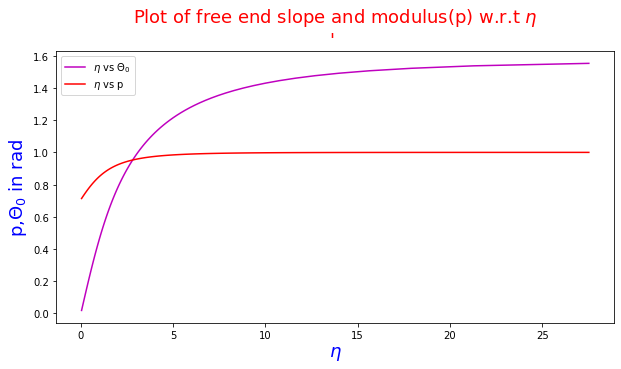

In [3]:
theta_0 = np.linspace(np.pi/180,89*np.pi/180,101)
p = []
eta = []

for i in range(0,101):
    p.append(np.sqrt((1+np.sin(theta_0[i]))/2))
    eta.append(pow(fun_mod(p[i]),2))

plt.figure(1,figsize=(10,5))
plt.title("Plot of free end slope and modulus(p) w.r.t $ \eta $ \n' ",fontsize=18 ,color='r')
plt.xlabel('$ \eta $' ,color='b',fontsize=18) 
plt.ylabel('p,$ \Theta_0 $ in rad',color='b',fontsize=18)
plt.plot(eta,theta_0,label ='$ \eta $ vs $ \Theta_0 $',color='m' )
plt.plot(eta,p,label ='$ \eta $ vs p',color='r')
plt.legend()

As we obtained the values of $ \eta $.Our next objective is to plot how the deflections at free end are going to vary with increase in $ \eta $.The expressions for deflections are given by:
\begin{gather}
    \begin{aligned}
        (1)\;x_{{def}}  &= \frac{2p(\cos \phi_{{0}}-\cos \phi)}{k}\\
        \frac{x_{{end}}}{L} &= \sqrt{\frac{2}{\eta}(2p^2-1)}\\
        \\
        (2)\frac{\Delta}{L}&=1-\frac{x_{{end}}}{L}=Shortening\;of\;beam\\
        \\
        (3)y_{{def}}  &= \frac{1}{k}(F(p,\phi) - F(p, \sin^{{-1}} (\frac {1}{p \sqrt 2}))-2E(p,\phi)+2E(p, \sin^{{-1}} (\frac {1}{p \sqrt 2})))\\
        \frac{y_{{end}}}{L} &=\frac{1}{\sqrt{\eta}}(K(p) - F(p, \sin^{{-1}} (\frac {1}{p \sqrt 2}))-2E(p)+2E(p, \sin^{{-1}} (\frac {1}{p \sqrt 2})))\\
    \end{aligned}
\end{gather}

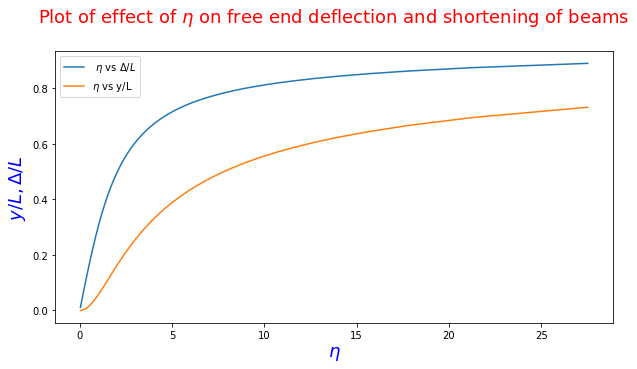

In [4]:
y_by_L = []      #Free End deflection in Y-axis
u_by_L = []      #Shortening of beam

for i in range(0,101):
    phi_0 = np.arcsin(1/(p[i]*np.sqrt(2)))
    y_by_L.append((1/np.sqrt(eta[i]))*(ellipk(pow(p[i],2))-ellipkinc(phi_0,pow(p[i],2))-2*ellipe(pow(p[i],2))+2*ellipeinc(phi_0,pow(p[i],2))))
    u_by_L.append(1-np.sqrt((2/eta[i]*(2*pow(p[i],2)-1))))
    
plt.figure(1,figsize=(10,5))
plt.title("Plot of effect of $ \eta $ on free end deflection and shortening of beams \n ",fontsize=18 ,color='r')
plt.xlabel('$ \eta $' ,color='b',fontsize=18) 
plt.ylabel('$ y/L,\Delta/L $',color='b',fontsize=18)
plt.plot(eta,y_by_L,label =' $ \eta $ vs $ \Delta/L $' )
plt.plot(eta,u_by_L,label = '$ \eta $ vs y/L')
plt.legend()

Now we proceed to plot the shape of the deflected beam for different values of $ \eta $.

This problem can be seen as a subset of the last problem and since the deflected curve obtained in this problem is the part of the deflected curve of a column with one end fixed and the other free i.e, the part of deflected curve(from $ \phi $ = $\sin^{-1}(\frac{1}{p\sqrt2})$ to $ \phi $ = $90^o $) obtained for the column  with one end fixed and the other free for a particular 'p'.

Here the choices to plot a deflected shape are<br>
(1)We can vary $ \phi $ from $ \phi_{{0}} $ to $90^o $ and get the (x,y) deflections of the points.<br>
(2)However, the more concrete one could be given the value of s and obtaining $ \phi $ and there by getting (x,y) deflections since it will make sure our formulation is correct.

The steps followed here are as follows:<br>
1) Obtain the length of fixed-free column for the given p and beam Length L<br>
2) Calculate the $ s_{{0}} $ corresponding to $ \phi_{{0}} $ and divide the length between $ s_{{0}} $ to $ s_{{0}} $+L into say 100 points<br>
3) Obtain $ \phi $ for each of the point and substitute $ \phi $ in above expressions to get the deflected shape.<br>


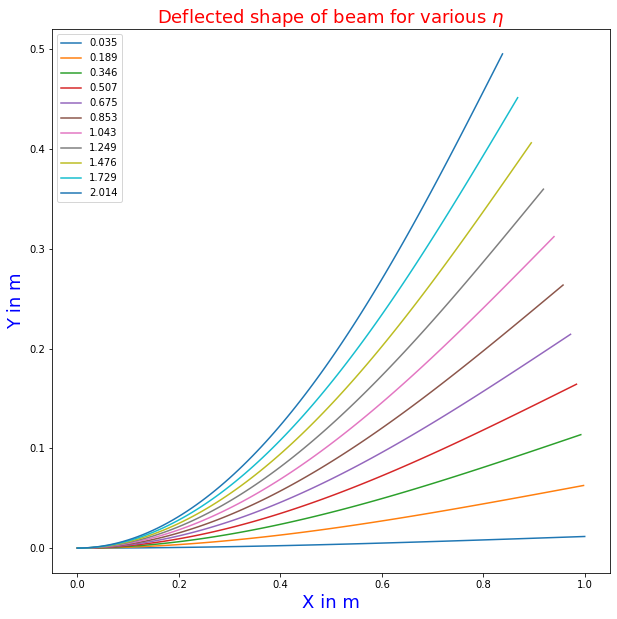

In [5]:
def fun_phi(phi) :
    return (k*s[i])-ellipkinc(phi,p_bar**2)

L = 1                                      #Length of the beam
n = 11                                     #No of iterations
m = 101                                    #No of points on beam

fig1  = plt.figure(1,figsize=(10,10))
plt.title("Deflected shape of beam for various $ \eta $ ",fontsize=18 ,color='r')
plt.xlabel('X in m' ,color='b',fontsize=18) 
plt.ylabel('Y in m',color='b',fontsize=18)


for j in range(0,n):
    p_bar = p[5*j]                         #Data for p&eta are loaded from above code
    eta_bar = eta[5*j]
    
    k = np.sqrt(eta_bar/L**2)
    L_bar = ellipk(p_bar**2)/k
    
    phi_0 = np.arcsin(1/(p_bar*np.sqrt(2)))
    s_0 = ellipkinc(phi_0,p_bar**2)/k
    

    s = np.linspace(s_0,s_0+L,101)
    phi = []
    x_def=[]
    y_def=[]
    h = 2*p_bar/k
    
    for i in range(0,m): 
        soln = root(fun_phi,1.5)
        phi.append(soln.x[0])
        y_def.append((ellipkinc(phi[i],p_bar**2)-ellipkinc(phi_0,p_bar**2)-2*ellipeinc(phi[i],p_bar**2)+2*ellipeinc(phi_0,p_bar**2))/k)
        x_def.append(h*(np.cos(phi_0)-np.cos(phi[i])))
    
    plt.plot(x_def,y_def,label= round(float(eta_bar),3))
    plt.legend()

Comparision of Euler Bernouli Beam and Elastica Beam

p = 0.8917975296052141
eta = 1.475846287426103


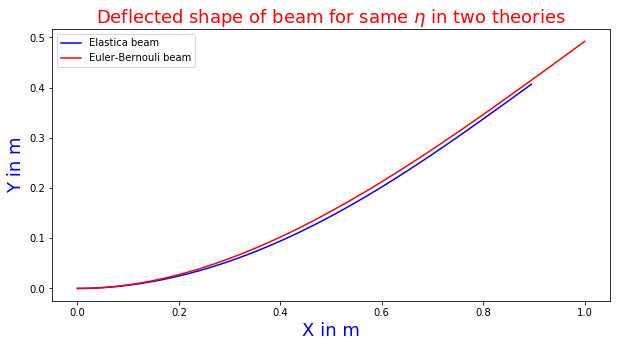

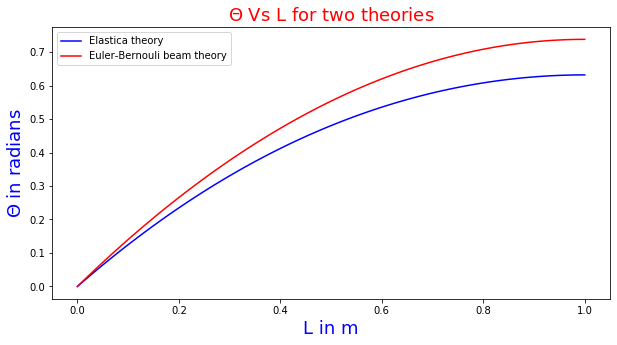

In [9]:
X_EB = np.linspace(0,L,101)
Y_EB = []
theta_EB = []

p_bar = p[40]                         
eta_bar = eta[40]

print("p =",p_bar)
print("eta =",eta_bar)

k = np.sqrt(eta_bar/L**2)
L_bar = ellipk(p_bar**2)/k

phi_0 = np.arcsin(1/(p_bar*np.sqrt(2)))
s_0 = ellipkinc(phi_0,p_bar**2)/k


s = np.linspace(s_0,s_0+L,101)
phi = []
x_def=[]
y_def=[]
theta = []
h = 2*p_bar/k
    
for i in range(0,101):
    
    soln = root(fun_phi,1.5)
    phi.append(soln.x[0])
    y_def.append((ellipkinc(phi[i],p_bar**2)-ellipkinc(phi_0,p_bar**2)-2*ellipeinc(phi[i],p_bar**2)+2*ellipeinc(phi_0,p_bar**2))/k)
    x_def.append(h*(np.cos(phi_0)-np.cos(phi[i])))
    theta.append(np.arcsin((2*p_bar**2*np.sin(phi[i])**2-1)))
    
    Y_EB.append(eta_bar*((2*L-3*(L-X_EB[i]))/6+((L-X_EB[i])**3/6*L**2)))
    theta_EB.append((eta_bar/2)*(1-((L-X_EB[i])/L)**2))

plt.figure(1,figsize=(10,5))
plt.title("Deflected shape of beam for same $ \eta $ in two theories ",fontsize=18 ,color='r')
plt.xlabel('X in m' ,color='b',fontsize=18) 
plt.ylabel('Y in m',color='b',fontsize=18)
plt.plot(x_def,y_def,label='Elastica beam',color='b')
plt.plot(X_EB,Y_EB,label='Euler-Bernouli beam',color='r')
plt.legend()

plt.figure(2,figsize=(10,5))
plt.title("$ \Theta $ Vs L for two theories",fontsize=18 ,color='r')
plt.xlabel('L in m' ,color='b',fontsize=18) 
plt.ylabel('$ \Theta $ in radians',color='b',fontsize=18)
plt.plot(X_EB,theta,label='Elastica theory',color='b')
plt.plot(X_EB,theta_EB,label='Euler-Bernouli beam theory',color='r')
plt.legend()

For the smaller values of $ \eta $ both the theories converge but as the $ \eta $ becomes large,Euler Bernouli beam thoery no more gives accurate results where as elastica has no problems in dealing with larger values of $ \eta $ 